Given File 'startup_funding.csv'

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to handle that.

Output Format :
year1 TotalFunding1
year2 TotalFunding2

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("startup_funding.csv")
df['Date'] = df['Date'].str.replace('.', '/')
df = df.dropna(subset = ["Date"])
years = df['Date'].str.split("/").str[2]
yearly_fundings = years.value_counts().sort_index()
yearly_fundings

Date
          1
2015    935
2016    993
2017    443
Name: count, dtype: int64

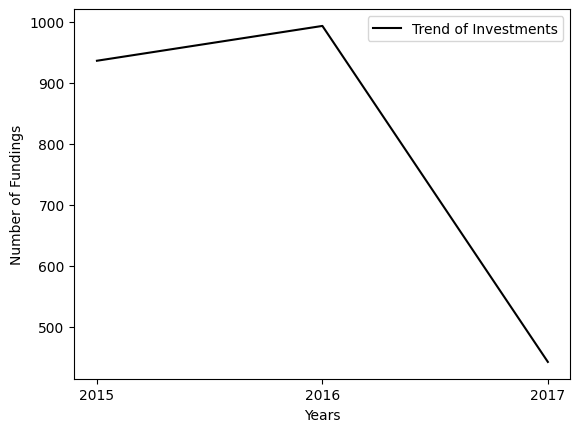

2015 936
2016 993
2017 443


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("startup_funding.csv")

# Clean the 'Date' column and extract the year
df['Date'] = df['Date'].str.replace('.', '/')
df = df.dropna(subset=["Date"])
df['Year'] = df['Date'].str.extract(r'(\d{4})')

# Count the number of fundings for each year
yearly_fundings = df['Year'].value_counts().sort_index()

# Plotting the trend
plt.plot(yearly_fundings.index, yearly_fundings.values, label="Trend of Investments", color = "black")
plt.xlabel("Years")
plt.ylabel("Number of Fundings")
plt.legend()
plt.show()

# Print year-wise total number of fundings
for year, count in yearly_fundings.items():
    print(f"{int(year)} {count}")

Given File 'startup_funding.csv'

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Output Format :
city1 number1
city2 number2

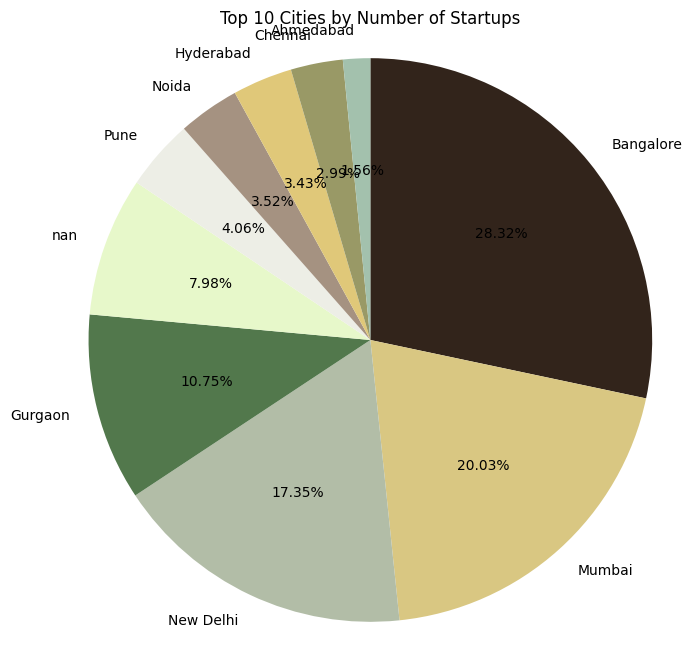

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
nan 179
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("startup_funding.csv")

# Drop rows with missing city location values
df['CityLocation'].dropna(inplace=True)

# Function to separate city name from additional information
def separateCity(city):
    if type(city) == str:
        return city.split("/")[0].strip()
    else:
        return str(city)

# Apply the function to clean city names
df['CityLocation'] = df['CityLocation'].apply(separateCity)

# Standardize city names
df.loc[df['CityLocation'] == 'bangalore', 'CityLocation'] = 'Bangalore'
df.loc[df['CityLocation'] == 'Delhi', 'CityLocation'] = 'New Delhi'

# Count the number of startups in each city
city_counts = df['CityLocation'].value_counts()[:10]

# Extract city names and corresponding startup counts
city_names = city_counts.index
num_of_startups = city_counts.values

# Define colors for the pie chart
colors = ["#32241b", "#d9c782", "#b2bda7", "#52784c", "#e7f8ca", "#edeee6", "#a59281", "#e0c879", "#999966", "#a3c1ad"]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(num_of_startups, labels=city_names, autopct="%.2f%%", colors=colors, startangle=90, counterclock=False)
plt.title("Top 10 Cities by Number of Startups")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print the top cities with their respective number of startups
for city, count in zip(city_names, num_of_startups):
    print(f"{city} {count}")

Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note:
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Output Format :
city1 percent1
city2 percent2
city3 percent3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("funding_startup.csv")

df['CityLocation'].dropna(inplace=True)

def separateCity(city):
    if type(city) == str:
        return city.split("/")[0].strip()
    else:
        return str(city)

df['CityLocation'] = df['CityLocation'].apply(separateCity)

df.loc[df['CityLocation'] == 'bangalore', 'CityLocation'] = 'Bangalore'
df.loc[df['CityLocation'] == 'Delhi', 'CityLocation'] = 'New Delhi'

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")

df['CityLocation'].dropna(inplace=True)

def separateCity(city):
    if type(city) == str:
        return city.split("/")[0].strip()
    else:
        return str(city)

df['CityLocation'] = df['CityLocation'].apply(separateCity)

df.loc[df['CityLocation'] == 'bangalore', 'CityLocation'] = 'Bangalore'
df.loc[df['CityLocation'] == 'Delhi', 'CityLocation'] = 'New Delhi'

indian_cities_funding = df[df['CityLocation'].str.contains('India', case=False)]
city_counts = indian_cities_funding['CityLocation'].value_counts()
top_10_cities = df['CityLocation'].value_counts()[:10]

total_funding_top_10 = top_10_cities.sum()

city_percentages = (top_10_cities / total_funding_top_10) * 100

city_percentages = city_percentages.round(2)

for city, percentage in city_percentages.items():
    print(f"{city} {percentage}")

Bangalore: 28.32
Mumbai: 20.03
New Delhi: 17.35
Gurgaon: 10.75
nan: 7.98
Pune: 4.06
Noida: 3.52
Hyderabad: 3.43
Chennai: 2.99
Ahmedabad: 1.56


There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3

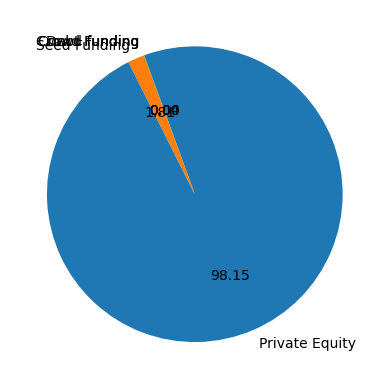

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd funding 0.00
Crowd Funding 0.00


In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("startup_funding.csv")

df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df['InvestmentType'].replace('CrowdFunding', 'Crowd Funding', inplace = True)
df['InvestmentType'].replace('DebtFunding', 'Debt Funding', inplace = True)

# df["AmountInUSD"] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(",", " ")))
df["AmountInUSD"] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(" ", "").replace(",", "")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending=False)[:10]
investment = df.index
amount = df.values
plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))

Given File 'startup_funding.csv'

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Output Format :
industry1 percent1
industry2 percent2
industry3 percent3

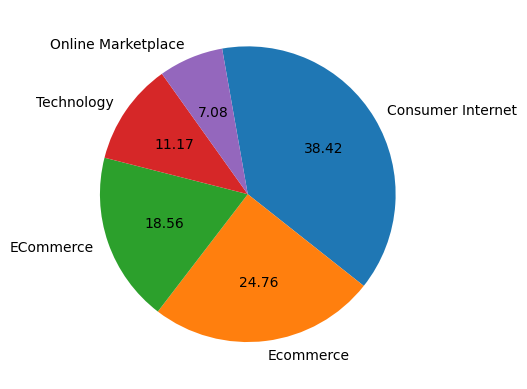

Consumer Internet 38.42
Ecommerce 24.76
ECommerce 18.56
Technology 11.17
Online Marketplace 7.08


In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("startup_funding.csv")
df['IndustryVertical'].replace('Ecommerce', 'Ecommerce', inplace = True)
df['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace = True)
df['IndustryVertical'].replace('ecommerce', 'Ecommerce', inplace = True)
df['AmountInUSD'] =df['AmountInUSD'].apply(lambda x: float(str(x).replace (",","")))
df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
industry = df.index
amount = df.values

plt.pie(amount, labels = industry, autopct = "%0.2f", counterclock = False, startangle = 100)
plt.show()
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))

Given File 'startup_funding.csv'

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:

In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.

Output Format :
investorname number

In [5]:
import pandas as pd
df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [9]:
df.InvestorsName.fillna('', inplace = True)
investors = df.InvestorsName
Investors_Name = []
for i in investors:
    if i!='':
        temp = i.split(",")
        for j in temp:
            Investors_Name.append(j.strip())
dct = {}
for i in Investors_Name:
    dct[i] = dct.get(i,0) + 1
for i in dct:
    print(i, dct[i])

Kae Capital 22
Triton Investment Advisors 1
Kashyap Deorah 3
Anand Sankeshwar 2
Deepak Jain 1
Sadashiva NT 1
Arjun Mehta 1
Satish Kaul 1
Anindya Ghose 1
Kunal Shah 17
LetsVenture 17
Anupam Mittal 18
Hetal Sonpal 1
Narottam Thudi 1
Shireesh Palle 1
Reliance Corporate Advisory Services Ltd 1
Infuse Ventures 8
JLL 2
Asset Management (Asia) Ltd 1
Digital Garage Inc 1
Kalaari Capital 44
Nexus India Capital Advisors 1
International Finance Corporation 2
Rocketship 2
Accel Partners 53
Jungle Ventures 13
Shailesh Rao 1
Venture Highway 3
BCCL 1
Blume Ventures 39
Contrarian Capital India Partners 1
Emergent Ventures India 1
Pallav Nadhani 4
Ashish Gupta 6
Sharad Sharma 4
Sirion Labs 1
India Quotient 21
Shunwei Capital 3
Sreeram Iyer 1
Suvo Sarkar 1
Anita Gupta 1
Likemind Ventures 1
Mitsui & Co. 2
Dunamis Ventures Pte Ltd 1
Venture Catalysts 7
Sourav Ganguly 1
Ankit Aditya 1
Moksh Sports Ventures 1
Fireside Ventures 5
Apurva Salarpuria 1
Sidharth Pansari 2
Sprout Capital 1
SBI-FMO Fund 1
Bessemer